In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [3]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import  Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

In [9]:
x_train[0].shape

(28, 28)

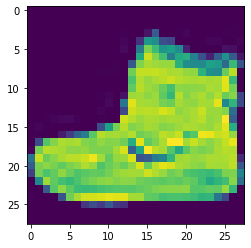

In [10]:
plt.imshow(x_train[0]); #heatmap

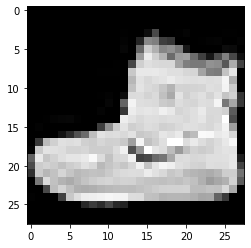

In [11]:
plt.imshow(x_train[0], cmap='gray');

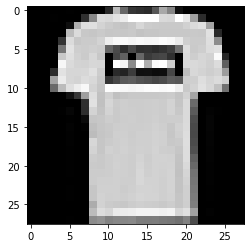

In [12]:
plt.imshow(x_train[1], cmap='gray');

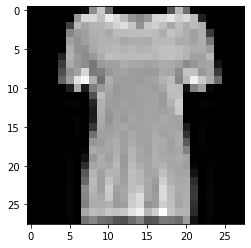

In [13]:
plt.imshow(x_train[10], cmap='gray');

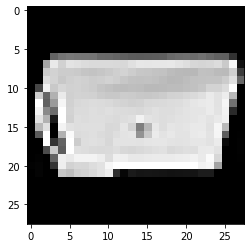

In [14]:
plt.imshow(x_train[110], cmap='gray');

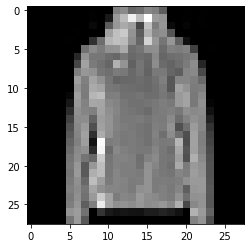

In [15]:
plt.imshow(x_train[59990], cmap='gray');

In [16]:
y_train[59990]

4

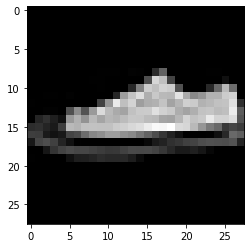

In [17]:
plt.imshow(x_train[35590], cmap='gray');

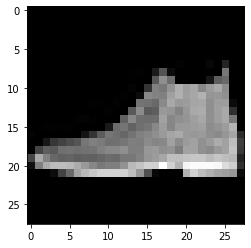

In [18]:
plt.imshow(x_test[0], cmap='gray');

In [19]:
y_test[0]

9

In [20]:
x_train, x_test = x_train/255.0, x_test/255.0

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [23]:
x_train.shape

(60000, 28, 28, 1)

In [24]:
x_test.shape

(10000, 28, 28, 1)

In [25]:
# Number of classes

K = len(set(y_train))
print("Number of classes:",K)

Number of classes: 10


In [26]:
x_train[0].shape

(28, 28, 1)

In [27]:
# Build the model

i = Input(shape= x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 12s 3ms/step - loss: 0.7098 - accuracy: 0.7395 - val_loss: 0.3941 - val_accuracy: 0.8536
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3644 - accuracy: 0.8636 - val_loss: 0.3532 - val_accuracy: 0.8620
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3095 - accuracy: 0.8848 - val_loss: 0.3383 - val_accuracy: 0.8737
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2743 - accuracy: 0.8971 - val_loss: 0.2962 - val_accuracy: 0.8919
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2502 - accuracy: 0.9053 - val_loss: 0.3157 - val_accuracy: 0.8853
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2253 - accuracy: 0.9140 - val_loss: 0.2955 - val_accuracy: 0.8940
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2040 - accuracy: 0.9221 - val_loss: 0.2995 - val_accuracy

**Observation:**

We are getting a decent accuracy. But, its definitely, not as high as MNIST. Thats because, Fashion MNIST is a far more difficult dataset than MNIST.

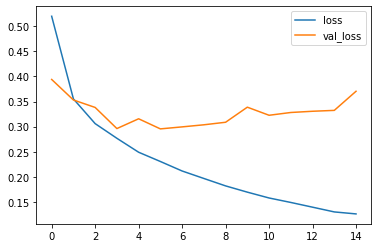

In [30]:
# Plot loss per iteration

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

**Observation:**

It appears that the model is overfitting a little bit since we see that the validation loss is slightly going up.

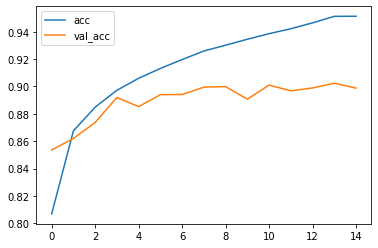

In [31]:
# Plot accuracy per iteration

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

Confusion matrix, without normalization
[[866   2  35  13   7   3  69   0   5   0]
 [  2 978   0  10   4   0   3   0   3   0]
 [ 19   1 868  11  57   0  40   0   4   0]
 [ 19  14  16 895  31   1  22   0   2   0]
 [  3   1  47  22 885   0  42   0   0   0]
 [  2   0   0   2   0 977   0  14   0   5]
 [124   5  75  24 121   0 641   1   9   0]
 [  0   0   0   0   0  20   0 960   0  20]
 [  5   0   5   2   5   1   6   3 973   0]
 [  0   0   0   0   0   9   1  44   1 945]]


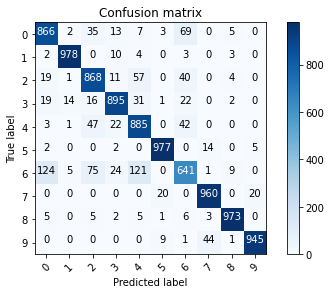

In [32]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [46]:
# Label Mapping

labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

In [47]:
print(labels[y_test[i]]);

Sneaker


In [48]:
y_test[i]

7

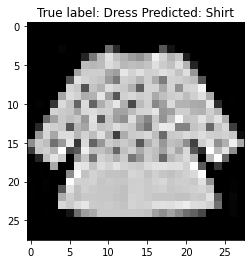

In [49]:
# Show some misclassified examples
misclassified_idx1 = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx1)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

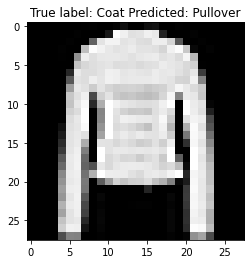

In [50]:
# Show some misclassified examples
misclassified_idx1 = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx1)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

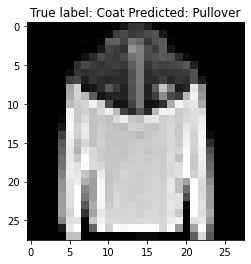

In [51]:
# Show some misclassified examples
misclassified_idx1 = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx1)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

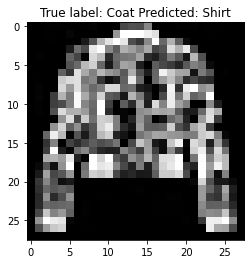

In [54]:
# Show some misclassified examples
misclassified_idx1 = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx1)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

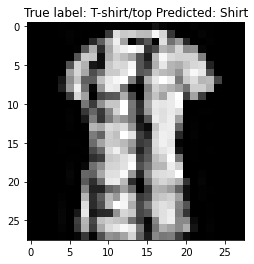

In [55]:
# Show some misclassified examples
misclassified_idx1 = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx1)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));